# Unified Logical Filtering Graph — LFT Visualization
This notebook constructs a unified graph of GHZ, Kochen–Specker, and Bell-type logical structures under Logic Field Theory (LFT).

### Legend:
- **Green nodes**: Proposition assignments
- **Black edges**: Logical implication
- **Red edges**: Contradiction/exclusivity constraints
- **Subsystems**: GHZ, KS, Bell components grouped visually


In [1]:
!pip install networkx matplotlib --quiet

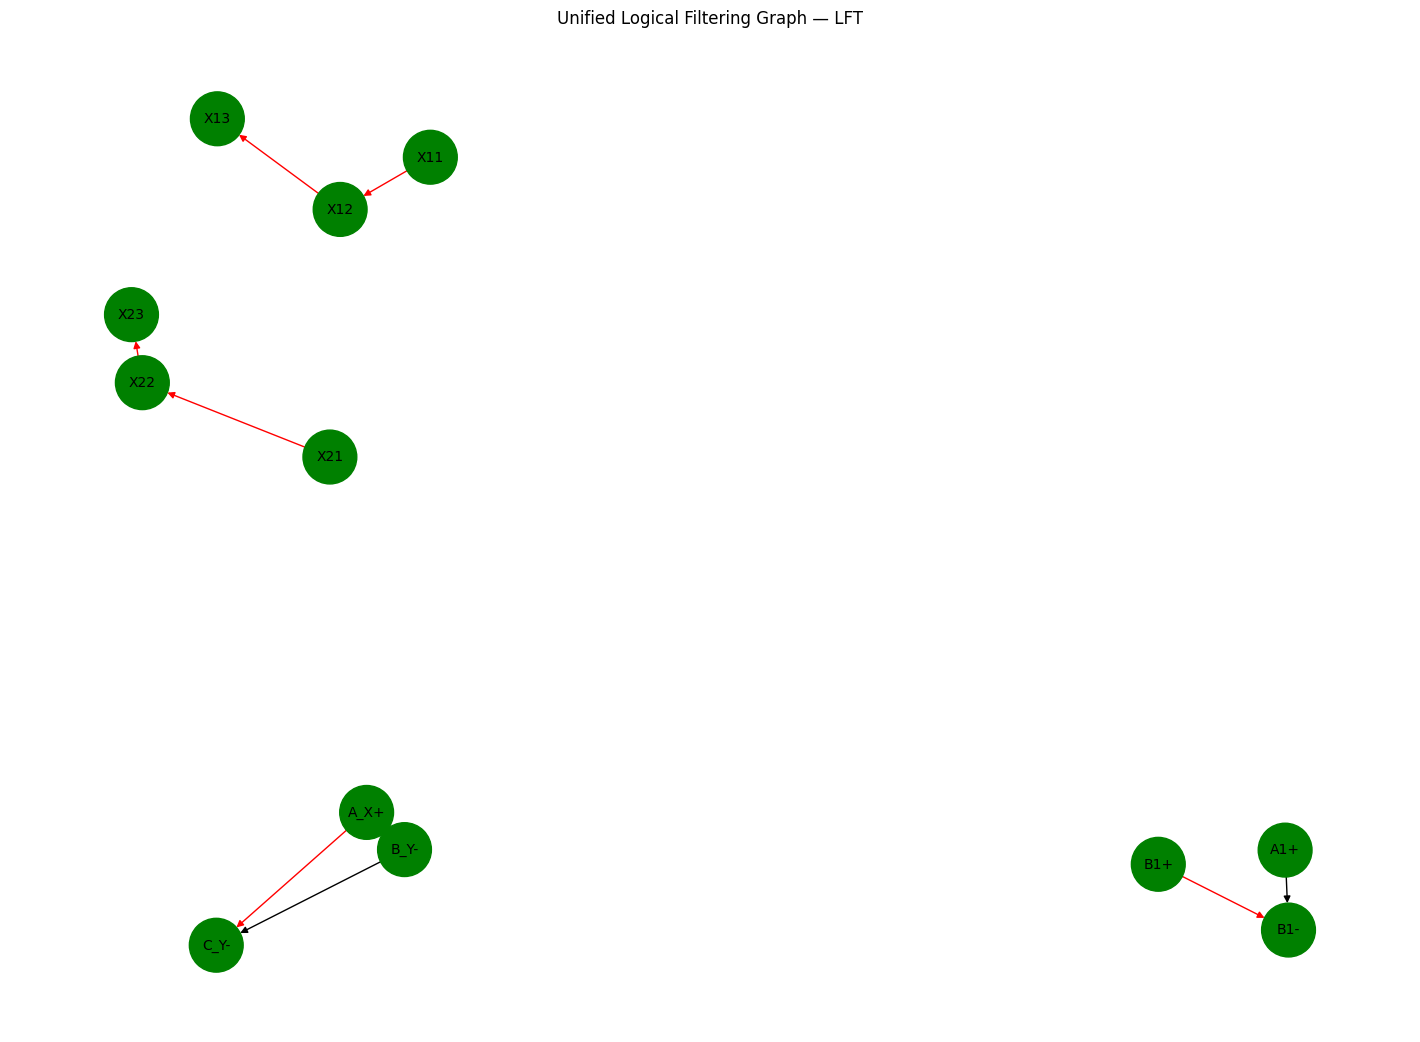

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Initialize graph
G = nx.DiGraph()

# --- GHZ Section ---
G.add_node("A_X+", color='green')
G.add_node("B_Y-", color='green')
G.add_node("C_Y-", color='green')
G.add_edge("A_X+", "B_Y-", color='black')
G.add_edge("B_Y-", "C_Y-", color='black')

# Contradiction in GHZ: A_X+ & C_Y- => mutually exclusive
G.add_edge("A_X+", "C_Y-", color='red')

# --- KS Section ---
ks_obs = ["X11", "X12", "X13", "X21", "X22", "X23"]
for k in ks_obs:
    G.add_node(k, color='green')
G.add_edge("X11", "X12", color='red')
G.add_edge("X21", "X22", color='red')
G.add_edge("X12", "X13", color='red')
G.add_edge("X22", "X23", color='red')

# --- Bell Section ---
G.add_node("A1+", color='green')
G.add_node("B1-", color='green')
G.add_node("B1+", color='green')
G.add_edge("A1+", "B1-", color='black')
G.add_edge("B1+", "B1-", color='red')  # contradiction

# Layout and draw
pos = nx.spring_layout(G, seed=42)
node_colors = [G.nodes[n]['color'] for n in G.nodes]
edge_colors = [G[u][v]['color'] for u,v in G.edges]

plt.figure(figsize=(14,10))
nx.draw(G, pos, with_labels=True, node_color=node_colors,
        edge_color=edge_colors, node_size=1500, font_size=10)
plt.title("Unified Logical Filtering Graph — LFT")
plt.axis('off')
plt.show()